<a href="https://colab.research.google.com/github/beve0x/Heart_disease_prediction/blob/main/Heart_Disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import pandas as pd
import numpy as np

Mounted at /content/drive/


In [ ]:
#load the file
file_path = '/content/drive/My Drive/Heart_Disease_Prediction.csv'
#rename the file to df_hr with the following requirements
#Skip the first 6 rows, include only the first 250 rows, set ‘Visit Date’ column as datetype, Use Patient_ID as the index
df_hr = pd.read_csv(file_path,
                    skiprows=6,
                    nrows=250,
                    parse_dates=['Visit Date'],
                    index_col='Patient_ID')



<ipython-input-3-f13bc483738b>:5: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df_hr = pd.read_csv(file_path,


In [ ]:
#Visually check for the dataframe
df_hr

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST_depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Visit Date
Patient_ID,,,,,,,,,,,,,,,
P_1,70 years,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,2004-11-04
P_2,67 years,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,2004-12-04
P_3,57 years,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,2004-04-13
P_4,64 years,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,2004-04-14
P_5,74 years,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,2004-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P_246,60 years,1,4,130,253,0,0,144,1,1.4,1,1,7,Presence,2004-12-12
P_247,65 years,1,4,110,248,0,2,158,0,0.6,1,2,6,Presence,2004-12-13
P_248,65 years,0,3,155,269,0,0,148,0,0.8,1,0,3,Absence,2004-12-14


In [ ]:
#Confirm pandas dataframe
type(df_hr)

pandas.core.frame.DataFrame

In [ ]:
#Confirm Data type
print(df_hr.dtypes)

Age                                object
Sex                                object
Chest pain type                    object
BP                                 object
Cholesterol                         int64
FBS over 120                       object
EKG results                         int64
Max HR                              int64
Exercise angina                    object
ST_depression                     float64
Slope of ST                         int64
Number of vessels fluro             int64
Thallium                           object
Heart Disease                      object
Visit Date                 datetime64[ns]
dtype: object


In [ ]:
#Remove the string ‘years’ from the entries in the ‘Age’ column
df_hr['Age'] = df_hr['Age'].str.replace('years','')
df_hr

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST_depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease,Visit Date
Patient_ID,,,,,,,,,,,,,,,
P_1,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence,2004-11-04
P_2,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence,2004-12-04
P_3,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence,2004-04-13
P_4,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence,2004-04-14
P_5,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence,2004-04-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P_246,60,1,4,130,253,0,0,144,1,1.4,1,1,7,Presence,2004-12-12
P_247,65,1,4,110,248,0,2,158,0,0.6,1,2,6,Presence,2004-12-13
P_248,65,0,3,155,269,0,0,148,0,0.8,1,0,3,Absence,2004-12-14


In [ ]:
#Identify and replace the string ‘missing’ with NaN values wherever it appears in the dataset
df_hr = df_hr.replace('missing', np.nan)

In [ ]:
#Set the datatype of the ‘ST_depression’ column to “float64”
df_hr['ST_depression'] = df_hr['ST_depression'].astype('float64')

In [ ]:
#Change the datatype of the ‘Sex’ column to “category”.
df_hr['Sex'] = df_hr['Sex'].astype('category')

In [ ]:
#Change the datatype of the ‘Heart Disease’ column to “category”.
df_hr['Heart Disease'] = df_hr['Heart Disease'].astype('category')

Task 2 : Perform the following analyses

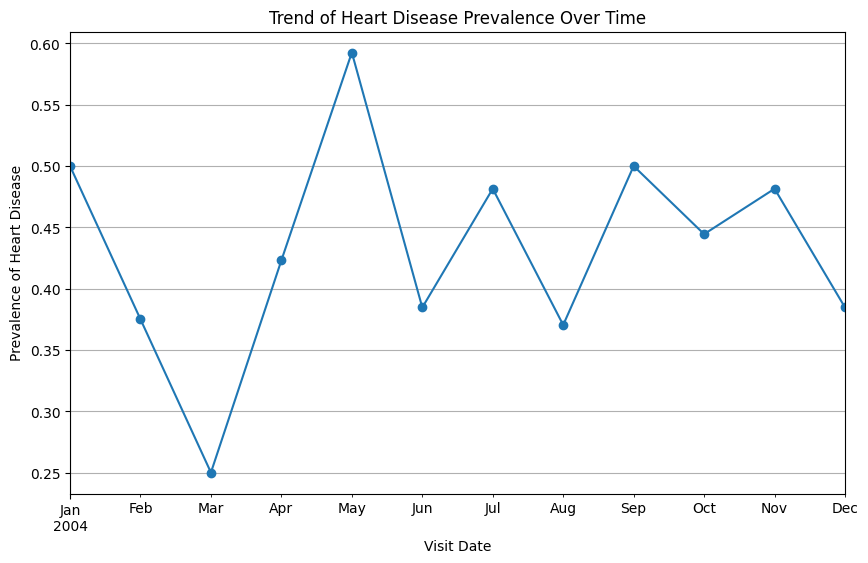

In [ ]:
#Trend Analysis: How has the prevalence of heart disease in patients varied over time (as per the 'Visit Date')?
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'Heart Disease' to a binary format for easier manipulation
df_hr['Heart Disease Present'] = (df_hr['Heart Disease'] == 'Presence').astype(int)

# Resample the data by month (or another period suitable to your data) and calculate the mean prevalence
# This mean value represents the proportion of patients with heart disease each month
trend_data = df_hr.resample('M', on='Visit Date')['Heart Disease Present'].mean()

# Plotting the trend
plt.figure(figsize=(10, 6))
trend_data.plot(marker='o', linestyle='-')
plt.title('Trend of Heart Disease Prevalence Over Time')
plt.xlabel('Visit Date')
plt.ylabel('Prevalence of Heart Disease')
plt.grid(True)
plt.show()



Over time we can see that the prevalance of heart disease drops in the month of March but has a spike to May and then regulates between 0.36 and 0.5 in the months after.

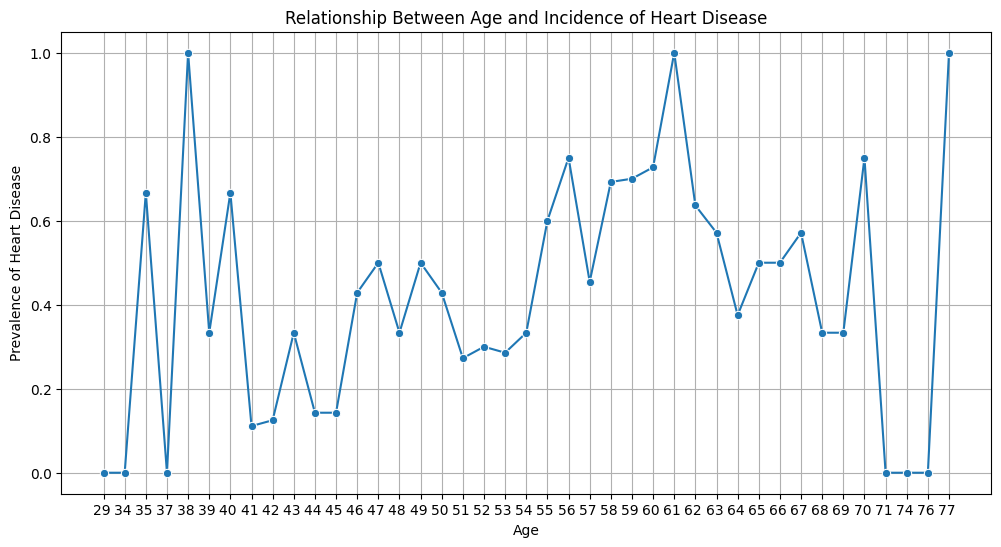

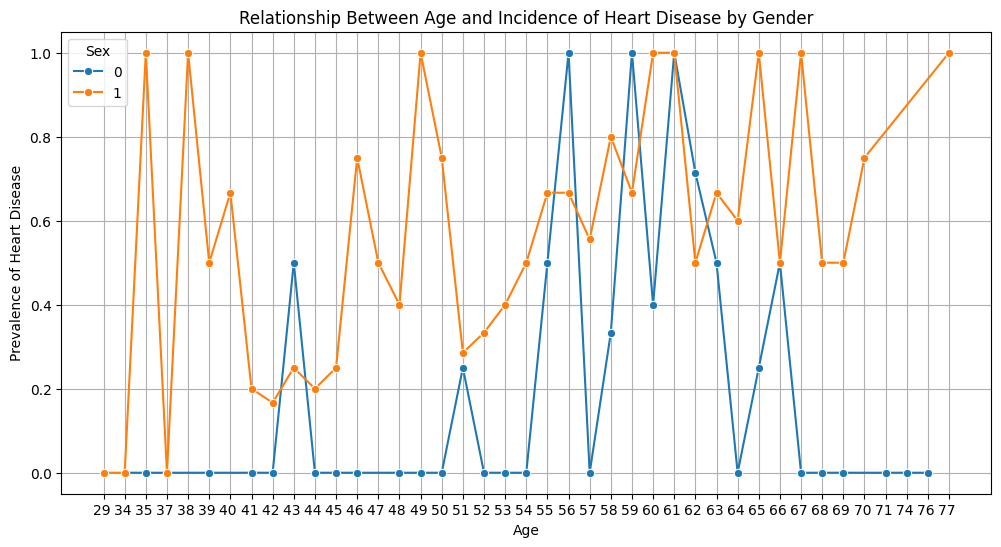

In [ ]:
#Demographic Analysis: What is the relationship between age and the incidence of heart disease?
#Does this relationship vary significantly by gender?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Group the data by 'Age' and calculate the mean prevalence of heart disease
age_group = df_hr.groupby('Age')['Heart Disease Present'].mean().reset_index()

# Visualize the relationship using a line plot for better trend observation
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_group, x='Age', y='Heart Disease Present', marker='o')

plt.title('Relationship Between Age and Incidence of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Prevalence of Heart Disease')
plt.grid(True)
plt.show()


#Does this relationship vary significantly by gender?

# Group the data by 'Age' and 'Sex', and calculate the mean prevalence of heart disease
age_gender_group = df_hr.groupby(['Age', 'Sex'])['Heart Disease Present'].mean().reset_index()

# Visualize the relationship using a line plot for better trend observation
plt.figure(figsize=(12, 6))
sns.lineplot(data=age_gender_group, x='Age', y='Heart Disease Present', hue='Sex', marker='o')

plt.title('Relationship Between Age and Incidence of Heart Disease by Gender')
plt.xlabel('Age')
plt.ylabel('Prevalence of Heart Disease')
plt.legend(title='Sex')
plt.grid(True)
plt.show()

The prevalance of heart disease increases at ages 35 till 40 and it gradually increases after which at 55 it makes a big spike to 61 after which it drops again to 0 from 71 till 76. After 76 there is a huge spike of high prevalance of heart disease.

Yes it seems that gender might have a difference as the graph shows that between 0 and 1 it varies significantly below ages of 55 and after 67. Between 55 and 67 it seems to be more aligned and the difference is not as significant.

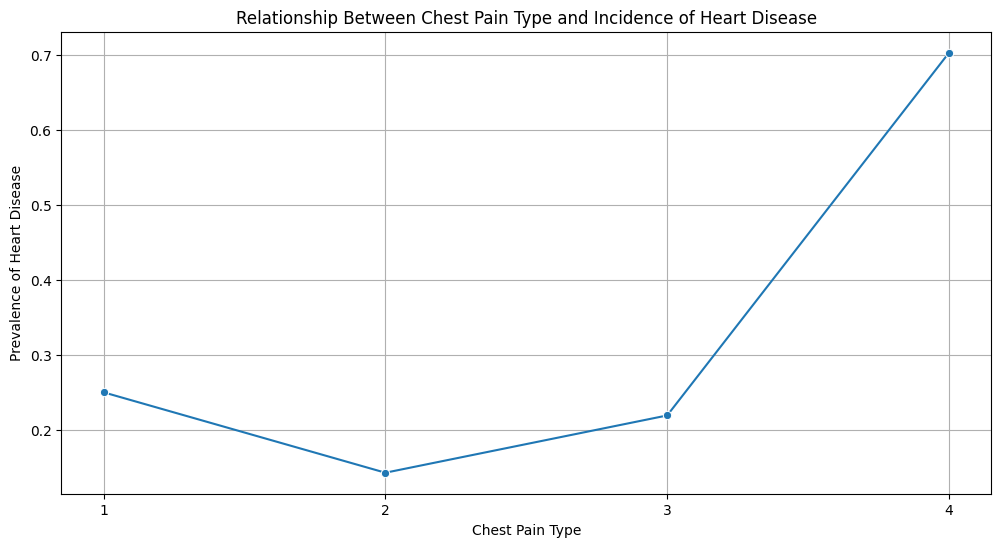

In [ ]:
#Chest Pain and Heart Disease Correlation: Which types of chest pain (Chest Pain Type) are most commonly associated with confirmed heart disease cases?
# Group the data by 'Chest pain type' and calculate the mean prevalence of heart disease
chest_pain_group = df_hr.groupby('Chest pain type')['Heart Disease Present'].mean().reset_index()

# Visualize the relationship using a line plot for better trend observation
plt.figure(figsize=(12, 6))
sns.lineplot(data=chest_pain_group, x='Chest pain type', y='Heart Disease Present', marker='o')

plt.title('Relationship Between Chest Pain Type and Incidence of Heart Disease')
plt.xlabel('Chest Pain Type')
plt.ylabel('Prevalence of Heart Disease')
plt.grid(True)
plt.show()



Chest pain type 4 should be most commonly associated with confirmed heart diesease cases since there is a spike in prevlaance of Heart disease.

<ipython-input-15-239b2a2853c7>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=heart_disease_prevalence, x='BP_Category', y='Heart Disease Present', palette='coolwarm')


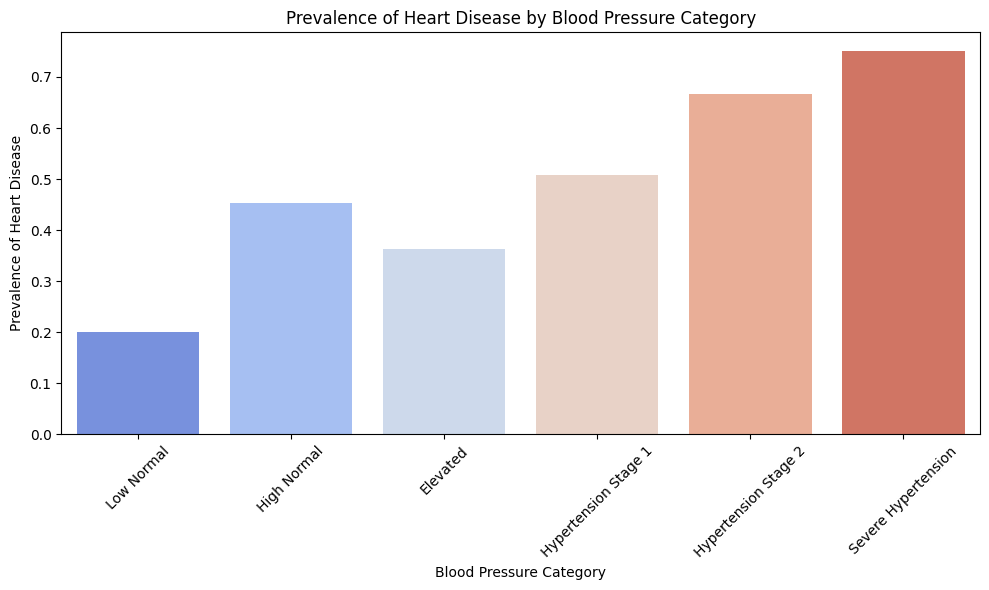

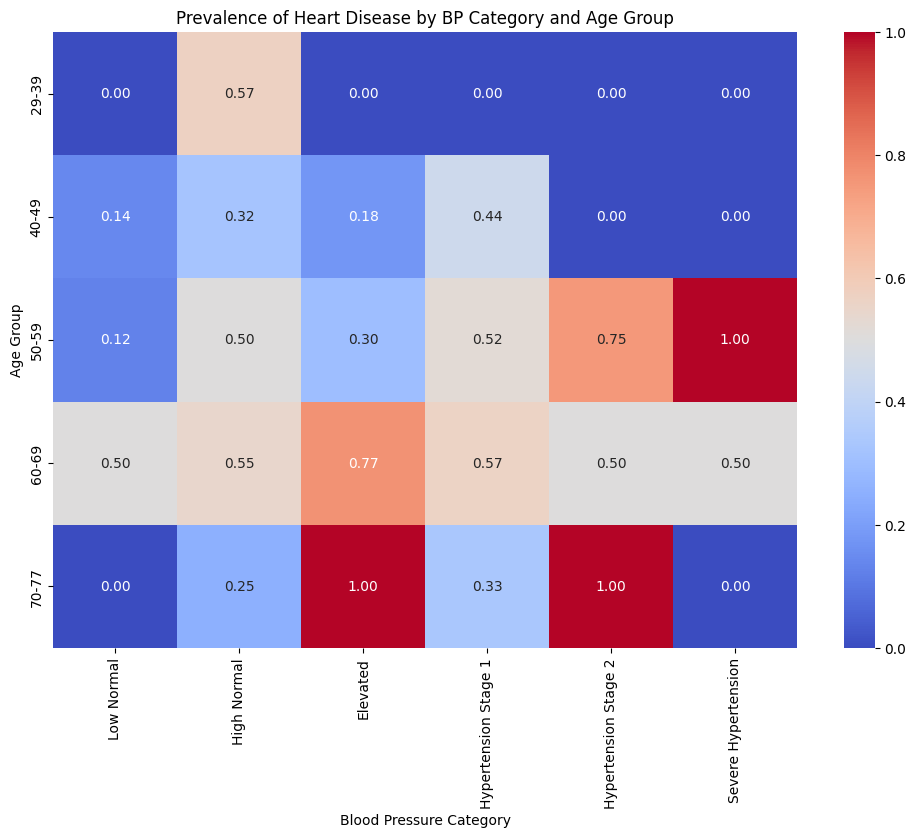

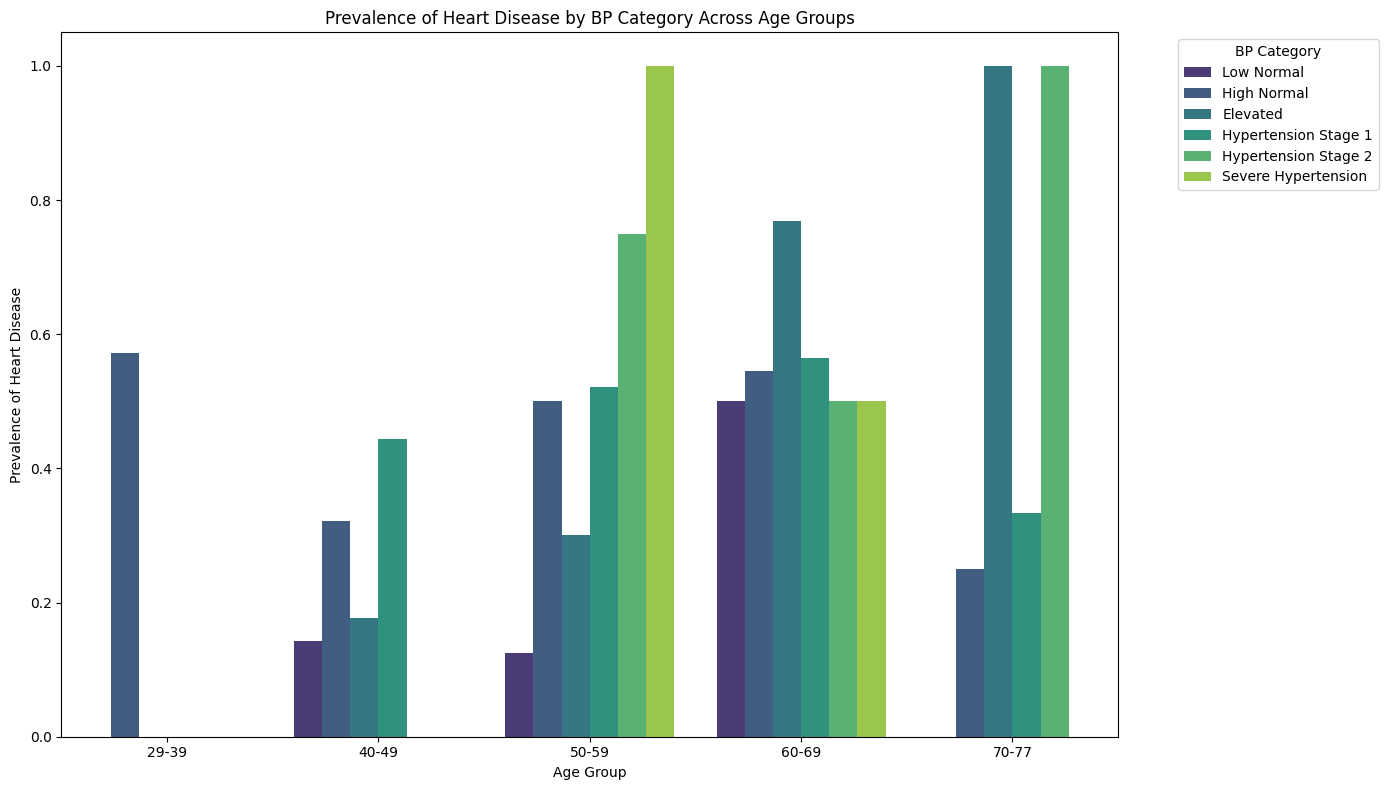

In [ ]:
#Blood Pressure Analysis: Is there a correlation between high blood pressure (BP) readings and the occurrence of heart disease?
#How does this relationship change across different age groups?
#First I am setting sub categories of blood pressure for better analysis
#Low Normal: 94-109 mm Hg
#High Normal: 110-129 mm Hg
#Elevated: 130-139 mm Hg
#Hypertension Stage 1: 140-159 mm Hg
#Hypertension Stage 2: 160-179 mm Hg
#Severe Hypertension: 180-200 mm Hg

# Convert 'BP' column to numeric, coercing any errors to NaN
df_hr['BP'] = pd.to_numeric(df_hr['BP'], errors='coerce')

# Define the bins and labels for categorization
bins = [94, 109, 129, 139, 159, 179, 200]
labels = ['Low Normal', 'High Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2', 'Severe Hypertension']

# Categorize the BP readings
df_hr['BP_Category'] = pd.cut(df_hr['BP'], bins=bins, labels=labels, right=False)

# Calculate the prevalence of heart disease in each BP category
heart_disease_prevalence = df_hr.groupby('BP_Category')['Heart Disease Present'].mean().reset_index()


# Convert 'Age' column to numeric, coercing any errors to NaN
df_hr['Age'] = pd.to_numeric(df_hr['Age'], errors='coerce')

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=heart_disease_prevalence, x='BP_Category', y='Heart Disease Present', palette='coolwarm')
plt.title('Prevalence of Heart Disease by Blood Pressure Category')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Prevalence of Heart Disease')
plt.xticks(rotation=45)  # Improve label readability
plt.tight_layout()  # Adjust layout to make room for the rotated x-labels
plt.show()


#Group the ages
age_bins = [29, 39, 49, 59, 69, 77]
age_labels = ['29-39', '40-49', '50-59', '60-69', '70-77']
df_hr['Age_Group'] = pd.cut(df_hr['Age'], bins=age_bins, labels=age_labels, right=True)
grouped_data = df_hr.groupby(['Age_Group', 'BP_Category'])['Heart Disease Present'].mean().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(grouped_data, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Prevalence of Heart Disease by BP Category and Age Group')
plt.xlabel('Blood Pressure Category')
plt.ylabel('Age Group')
plt.show()

prevalence_data = df_hr.groupby(['Age_Group', 'BP_Category'])['Heart Disease Present'].mean().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(data=prevalence_data, x='Age_Group', y='Heart Disease Present', hue='BP_Category', palette='viridis')

plt.title('Prevalence of Heart Disease by BP Category Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Prevalence of Heart Disease')
plt.legend(title='BP Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


According to the first bar graph, you can see that there are higher prevalence rates in the "Hypertension Stage 1", "Hypertension Stage 2", and "Severe Hypertension" categories, potentially underscoring the correlation between elevated blood pressure and heart disease risk.

In the correaltion table, there is a strong correlation indicated for the age ranges of 50-59 and 70-77 but there is also a general trend showing an increase in correlation as the age group goes up with prevalance of heart diseases. This is further shown in the third bar chart that indicates different blood pressure categories according age groups. It shows that there are more instances of higher BP levels as the age group goes up and at the last age group it shows that the severe hypertension is no longer present, potentially indicating that it may have caused the younger age group to retire early or it may have pushed the elderly to focus on healthier habits.

Average Cholesterol Level in Patients with Heart Disease: 255.4


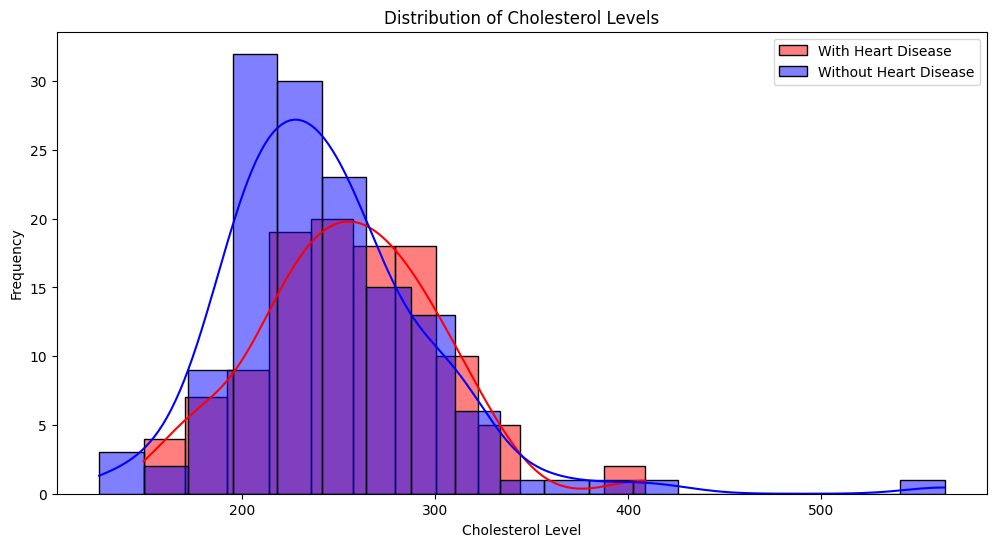

In [ ]:
#Cholesterol Level Insights: Analyze the distribution of cholesterol levels in patients with and without heart disease;
#what is the average cholesterol level in patients diagnosed with heart disease?

# Filter patients with heart disease
patients_with_hd = df_hr[df_hr['Heart Disease'] == 'Presence']

# Filter patients without heart disease
patients_without_hd = df_hr[df_hr['Heart Disease'] == 'Absence']

# Calculate average cholesterol level in patients with heart disease
average_cholesterol_hd = patients_with_hd['Cholesterol'].mean().round(2)
print(f"Average Cholesterol Level in Patients with Heart Disease: {average_cholesterol_hd}")

# Plot distribution of cholesterol levels
plt.figure(figsize=(12, 6))

sns.histplot(patients_with_hd['Cholesterol'], color="red", label='With Heart Disease', kde=True)
sns.histplot(patients_without_hd['Cholesterol'], color="blue", label='Without Heart Disease', kde=True)

plt.title('Distribution of Cholesterol Levels')
plt.xlabel('Cholesterol Level')
plt.ylabel('Frequency')
plt.legend()

plt.show()

The distribution of Cholesterol Levels is found to be higher on average for those with heart disease and lower on average for those without heart disease because the distribution for those without heart disease is skewed more to the left, indicating a lower cholesterol level.

Heart Disease   Absence  Presence
FBS over 120                     
0              0.556604  0.443396
1              0.540541  0.459459


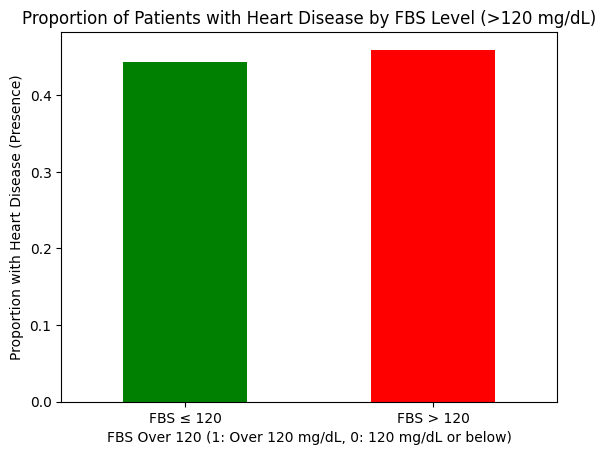

In [ ]:
#Impact of Diabetes on Heart Health: Investigate the proportion of patients with a fasting blood sugar over 120 (FBS over 120)
#who are also diagnosed with heart disease.
#How does this compare to those with normal FBS levels?\
# Calculate the proportion of patients with heart disease within each FBS over 120 group
proportion_hd_by_fbs = df_hr.groupby('FBS over 120')['Heart Disease'].value_counts(normalize=True).unstack()

# Display proportions
print(proportion_hd_by_fbs)

# Plotting the proportion of patients with heart disease ('Presence')
proportion_hd_by_fbs['Presence'].plot(kind='bar', color=['green', 'red'])
plt.title('Proportion of Patients with Heart Disease by FBS Level (>120 mg/dL)')
plt.xlabel('FBS Over 120 (1: Over 120 mg/dL, 0: 120 mg/dL or below)')
plt.ylabel('Proportion with Heart Disease (Presence)')
plt.xticks(ticks=[0, 1], labels=['FBS ≤ 120', 'FBS > 120'], rotation=0)
plt.show()


Patients with fasting blood sugar levels above 120 mg/dL have a higher incidence of heart disease, aligning with the understanding that diabetes or pre-diabetes conditions exacerbate heart disease risk. A marginal increase in the prevalence of heart disease among patients with higher FBS levels, suggests that elevated fasting blood sugar is associated with a slightly increased risk of heart disease.

Heart Disease   Absence  Presence
EKG results                      
0              0.641026  0.358974
1              0.500000  0.500000
2              0.473282  0.526718


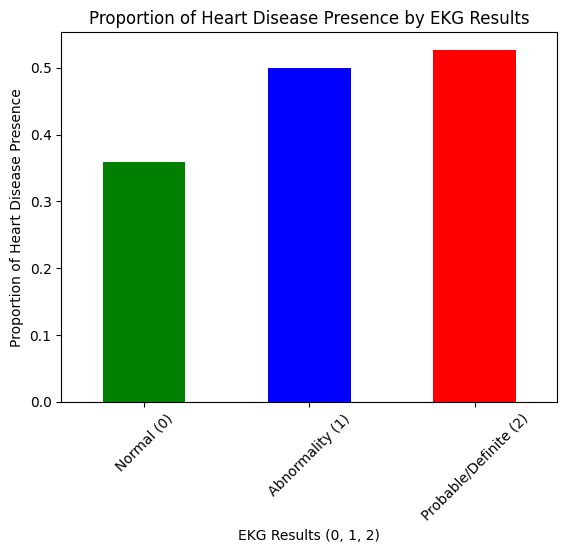

In [ ]:
#EKG Results and Heart Disease: What patterns can be observed in the EKG results of patients diagnosed with heart disease?
#Are certain types of EKG abnormalities more prevalent?
# Group the data by 'EKG results' and 'Heart Disease', then calculate the proportion of 'Presence' within each EKG result category
ekg_hd_proportions = df_hr.groupby('EKG results')['Heart Disease'].value_counts(normalize=True).unstack()

print(ekg_hd_proportions)


# Plotting the proportion of heart disease presence for each EKG result type
ekg_hd_proportions['Presence'].plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Proportion of Heart Disease Presence by EKG Results')
plt.xlabel('EKG Results (0, 1, 2)')
plt.ylabel('Proportion of Heart Disease Presence')
plt.xticks(ticks=[0, 1, 2], labels=['Normal (0)', 'Abnormality (1)', 'Probable/Definite (2)'], rotation=45)
plt.show()


64.10% of patients with a normal EKG(0) result do not have heart disease ('Absence'), while 35.89% do ('Presence'). This suggests that patients with normal EKG results have a lower prevalence of heart disease compared to the other categories.
The distribution is evenly split for patients with EKG abnormalities(1), with 50% not having heart disease and 50% having it. This indicates that an EKG abnormality is associated with a higher risk of heart disease compared to a normal EKG result.
Patients with EKG results indicating probable or definite heart abnormalities show a higher prevalence of heart disease, with 52.67% showing the presence of heart disease and 47.32% showing its absence. This category has the highest proportion of heart disease presence among the three.

There is a gradual increase in heart diseases presence as the ekg results go from 0 to 2, indicating a possible correlation between the ekg results and heart problems.

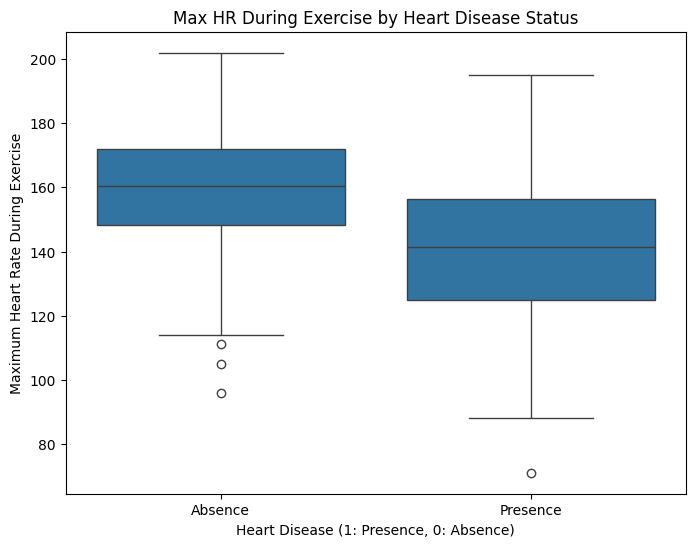

        Max HR
Max HR     1.0


<ipython-input-27-13fdc5417293>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df_hr[['Max HR', 'Heart Disease Numeric']].corr()


In [ ]:
#Exercise Impact on Heart Health: Assess the relationship between maximum heart rate during exercise (Max HR) and heart disease.
#Does lower max HR during exercise correlate with higher heart disease incidence?


df_hr['Heart Disease Numeric'] = df_hr['Heart Disease'].apply(lambda x: 1 if x == 'Presence' else 0)

plt.figure(figsize=(8, 6))
sns.boxplot(data=df_hr, x='Heart Disease', y='Max HR')
plt.title('Max HR During Exercise by Heart Disease Status')
plt.xlabel('Heart Disease (1: Presence, 0: Absence)')
plt.ylabel('Maximum Heart Rate During Exercise')
plt.show()


correlation = df_hr[['Max HR', 'Heart Disease Numeric']].corr()
print(correlation)


Both groups have a wide range of Max HR values, as indicated by the whiskers, but the group without heart disease has a slightly wider range, indicating that individuals without heart disease can reach both lower and higher maximum heart rates during exercise compared to those with heart disease.

The median Max HR appears to be slightly lower for the group with heart disease compared to the group without. This suggests that, on average, individuals with heart disease tend to have a lower maximum heart rate during exercise.

There are a few outliers in both groups, in the 'Absence' group, there are outliers on the lower end, while in the 'Presence' group, there is one outlier on the higher end. This might indicate exceptional cases that do not follow the general trend.
